# Python for Data Analysis - 2

In [240]:
# %pprint
# %precision %0.3f

if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
    RunningInCOLAB = True
else:
    print('Not running on CoLab')
    RunningInCOLAB = False

%config IPCompleter.greedy = True
%config IPCompleter.use_jedi = False

Running on CoLab


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.
  if sys.path[0] == '':


In [122]:
# Display full output of cell not just last line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [123]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [124]:
import numpy as np
np.set_printoptions(edgeitems=10, linewidth=120) # set numpy output width
np.set_printoptions(precision=3)
#np.set_printoptions(edgeitems=10, linewidth=180) # set numpy output width
np.set_printoptions(formatter={'float': '{: 0.3f}'.format}) # formatter is always reset with a call to set_printoptions so must be last to stand

In [125]:
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.float_format = "{:.3f}".format
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
%pwd

'/content/pydata-book-2nd-edition'

# 14. Data Analysis Examples

## 14.1 1.USA.gov Data from Bitly

In [128]:
import os

def find_file(name, path = "./"):
    for root, dirs, files in os.walk(path):
        if name in files:
            return os.path.join(root, name)
    return ''

if RunningInCOLAB == True and find_file("2nd-edition.zip") == "":
        !wget 'https://github.com/wesm/pydata-book/archive/2nd-edition.zip'
        !unzip -o "2nd-edition.zip"

if RunningInCOLAB == True:
    os.chdir('/content/pydata-book-2nd-edition/')

!pwd

--2020-09-04 20:35:11--  https://github.com/wesm/pydata-book/archive/2nd-edition.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/wesm/pydata-book/zip/2nd-edition [following]
--2020-09-04 20:35:11--  https://codeload.github.com/wesm/pydata-book/zip/2nd-edition
Resolving codeload.github.com (codeload.github.com)... 140.82.112.9
Connecting to codeload.github.com (codeload.github.com)|140.82.112.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘2nd-edition.zip’

2nd-edition.zip         [             <=>    ]  40.36M  5.00MB/s    in 8.1s    

2020-09-04 20:35:19 (5.00 MB/s) - ‘2nd-edition.zip’ saved [42321766]

Archive:  2nd-edition.zip
3b178c65c8a8f48a2a314f60626ae1905e5f02cb
   creating: pydata-book-2nd-edition/
 extracting: pydata-book-2nd-edition/.gitignore  

In [129]:
path = 'datasets/bitly_usagov/example.txt'
f = open(path)
print(f.readline())
f.close()

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }



In [130]:
import json
with open(path) as f:
    records = [json.loads(line) for line in f]
records[0]
len(records)

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

3560

In [131]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [132]:
# Get top 10 listed time zones using Counter object
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [133]:
def get_count(sequence):
    count_dict = {}
    for x in sequence:
        if x in count_dict:
            count_dict[x] += 1
        else:
            count_dict[x] = 1
    # tranform the dictionary to a sorted list of tuples
    sorted_list  = sorted(count_dict.items(), key=lambda item: item[1], reverse=True)
    # re-create and return as sorted dictionary
    return {k: v for k, v in sorted_list}

In [134]:
counts = get_count(time_zones)

In [135]:
frame = pd.DataFrame(records)
frame
print(frame._is_copy)

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.000,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1331923247.000,1331822918.000,Danvers,"[42.576698, -70.954903]",nan,NaN
1,GoogleMaps/RochesterNY,US,0.000,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1331923249.000,1308262393.000,Provo,"[40.218102, -111.613297]",nan,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.000,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1331923250.000,1331919941.000,Washington,"[38.9007, -77.043098]",nan,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.000,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1331923249.000,1331923068.000,Braz,"[-23.549999, -46.616699]",nan,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.000,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1331923251.000,1273672411.000,Shrewsbury,"[42.286499, -71.714699]",nan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.000,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1331926841.000,1301298479.000,Paramus,"[40.9445, -74.07]",nan,NaN
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.000,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1331926844.000,1307530247.000,Oklahoma City,"[35.4715, -97.518997]",nan,NaN
3557,GoogleMaps/RochesterNY,US,0.000,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1331926846.000,1308262393.000,Provo,"[40.218102, -111.613297]",nan,NaN
3558,GoogleProducer,US,0.000,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1331926847.000,1327528527.000,Mountain View,"[37.419201, -122.057404]",nan,NaN


None


In [136]:
tz_counts = frame['tz'].value_counts()
tz_counts
type(tz_counts)

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
                       ... 
Africa/Casablanca         1
America/Costa_Rica        1
Europe/Uzhgorod           1
Asia/Novosibirsk          1
America/Lima              1
Name: tz, Length: 97, dtype: int64

pandas.core.series.Series

In [137]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'

In [138]:
tz_counts = clean_tz.value_counts()
tz_counts

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
                       ... 
Europe/Ljubljana          1
Asia/Novosibirsk          1
Europe/Uzhgorod           1
Africa/Casablanca         1
America/Lima              1
Name: tz, Length: 98, dtype: int64

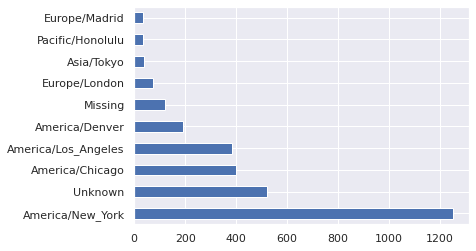

In [139]:
tz_counts[:10].plot(kind='barh')

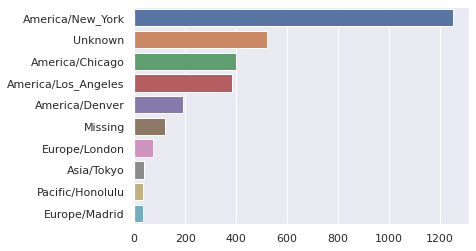

In [140]:
sns.barplot(tz_counts[:10].values, tz_counts[:10].index)

In [141]:
tz_counts
type(tz_counts)

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
                       ... 
Europe/Ljubljana          1
Asia/Novosibirsk          1
Europe/Uzhgorod           1
Africa/Casablanca         1
America/Lima              1
Name: tz, Length: 98, dtype: int64

pandas.core.series.Series

In [142]:
frame.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.000,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1331923247.000,1331822918.000,Danvers,"[42.576698, -70.954903]",nan,NaN
1,GoogleMaps/RochesterNY,US,0.000,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1331923249.000,1308262393.000,Provo,"[40.218102, -111.613297]",nan,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.000,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1331923250.000,1331919941.000,Washington,"[38.9007, -77.043098]",nan,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.000,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1331923249.000,1331923068.000,Braz,"[-23.549999, -46.616699]",nan,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.000,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1331923251.000,1273672411.000,Shrewsbury,"[42.286499, -71.714699]",nan,NaN


In [143]:
results = pd.Series(agent.split()[0] for agent in frame['a'].dropna())
results

0                  Mozilla/5.0
1       GoogleMaps/RochesterNY
2                  Mozilla/4.0
3                  Mozilla/5.0
4                  Mozilla/5.0
                 ...          
3435               Mozilla/4.0
3436               Mozilla/5.0
3437    GoogleMaps/RochesterNY
3438            GoogleProducer
3439               Mozilla/4.0
Length: 3440, dtype: object

In [144]:
results.value_counts()[:10]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
BlackBerry8520/5.0.0.592       3
Dalvik/1.4.0                   3
dtype: int64

In [145]:
cframe = frame[frame.a.notnull()] # returns a copy of the matching rows from the original dataframe
cframe._is_copy = None # decouple the dataframe from its origin to avoid copy warning
cframe.loc[:, 'os'] = np.where(cframe.a.str.contains('Windows'), 'Windows', 'Not Windows')
cframe['tz'].fillna('Missing', inplace = True)
cframe['tz'].replace('', 'Unknown', inplace=True)

In [146]:
cframe._is_view # is cframe a view (reference) to another frame??

False

In [147]:
print(cframe._is_copy)

None


In [148]:
cframe[['tz', 'os']][:10]

,tz,os
0,America/New_York,Windows
1,America/Denver,Not Windows
2,America/New_York,Windows
3,America/Sao_Paulo,Not Windows
4,America/New_York,Windows
5,America/New_York,Windows
6,Europe/Warsaw,Windows
7,Unknown,Windows
8,Unknown,Not Windows
9,Unknown,Windows


In [149]:
by_tz_os = cframe.groupby(['tz', 'os'])

In [150]:
by_tz_os.count()

a   c   nk  gr    g    h    l   al   hh    r    u    t   hc  \
tz                  os                                                                           
Africa/Cairo        Windows        3   3    3   3    3    3    3    3    3    3    3    3    3   
Africa/Casablanca   Windows        1   1    1   1    1    1    1    1    1    1    1    1    1   
Africa/Ceuta        Windows        2   2    2   2    2    2    2    2    2    2    2    2    2   
Africa/Johannesburg Windows        1   1    1   1    1    1    1    1    1    1    1    1    1   
Africa/Lusaka       Windows        1   1    1   1    1    1    1    1    1    1    1    1    1   
...                              ...  ..  ...  ..  ...  ...  ...  ...  ...  ...  ...  ...  ...   
Pacific/Auckland    Not Windows    3   3    3   3    3    3    3    3    3    3    3    3    3   
                    Windows        8   8    8   8    8    8    8    1    8    8    8    8    8   
Pacific/Honolulu    Windows       36  36   36  36   36   36   36   36   36   36   36   36   36   
Unknown             Not Windows  245   0  245   0  245  245  245  239  245  245  245  245  245   
                    Windows      276   0  276   0  276  276  276  268  276  276  276  276  276   

                                 cy  ll  _heartbeat_  kw  
tz                  os                                    
Africa/Cairo        Windows       3   3            0   0  
Africa/Casablanca   Windows       1   1            0   0  
Africa/Ceuta        Windows       2   2            0   0  
Africa/Johannesburg Windows       1   1            0   0  
Africa/Lusaka       Windows       1   1            0   0  
...                              ..  ..          ...  ..  
Pacific/Auckland    Not Windows   3   3            0   0  
                    Windows       8   8            0   0  
Pacific/Honolulu    Windows      36  36            0  32  
Unknown             Not Windows   0   0            0   4  
                    Windows       0   0            0   7  

[149 rows x 17 columns]

In [151]:
by_tz_os.size()
type(by_tz_os.size())
by_tz_os.size().index

tz                   os         
Africa/Cairo         Windows          3
Africa/Casablanca    Windows          1
Africa/Ceuta         Windows          2
Africa/Johannesburg  Windows          1
Africa/Lusaka        Windows          1
                                   ... 
Pacific/Auckland     Not Windows      3
                     Windows          8
Pacific/Honolulu     Windows         36
Unknown              Not Windows    245
                     Windows        276
Length: 149, dtype: int64

pandas.core.series.Series

MultiIndex([(                  'Africa/Cairo',     'Windows'),
            (             'Africa/Casablanca',     'Windows'),
            (                  'Africa/Ceuta',     'Windows'),
            (           'Africa/Johannesburg',     'Windows'),
            (                 'Africa/Lusaka',     'Windows'),
            (             'America/Anchorage', 'Not Windows'),
            (             'America/Anchorage',     'Windows'),
            ('America/Argentina/Buenos_Aires', 'Not Windows'),
            (     'America/Argentina/Cordoba',     'Windows'),
            (     'America/Argentina/Mendoza',     'Windows'),
            ...
            (                'Europe/Vilnius',     'Windows'),
            (              'Europe/Volgograd',     'Windows'),
            (                 'Europe/Warsaw', 'Not Windows'),
            (                 'Europe/Warsaw',     'Windows'),
            (                 'Europe/Zurich', 'Not Windows'),
            (              'Pacific/Auc

In [152]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts
type(agg_counts)

os,Not Windows,Windows
tz,,
Africa/Cairo,0.000,3.000
Africa/Casablanca,0.000,1.000
Africa/Ceuta,0.000,2.000
Africa/Johannesburg,0.000,1.000
Africa/Lusaka,0.000,1.000
...,...,...
Europe/Warsaw,1.000,15.000
Europe/Zurich,4.000,0.000
Pacific/Auckland,3.000,8.000


pandas.core.frame.DataFrame

In [153]:
indexer = agg_counts.sum(1).argsort()
type(indexer)
indexer # an indexer[0] value tells you the index of the item in the original agg_counts that will be the top in a sorted agg_counts

pandas.core.series.Series

tz
Africa/Cairo           75
Africa/Casablanca      36
Africa/Ceuta           35
Africa/Johannesburg    54
Africa/Lusaka          33
                       ..
Europe/Warsaw          14
Europe/Zurich          21
Pacific/Auckland       11
Pacific/Honolulu       96
Unknown                28
Length: 97, dtype: int64

In [154]:
count_subset = agg_counts.take(indexer[-10:])
count_subset
type(count_subset)

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.000,20.000
Europe/Madrid,16.000,19.000
Pacific/Honolulu,0.000,36.000
Asia/Tokyo,2.000,35.000
Europe/London,43.000,31.000
America/Denver,132.000,59.000
America/Los_Angeles,130.000,252.000
America/Chicago,115.000,285.000
Unknown,245.000,276.000


pandas.core.frame.DataFrame

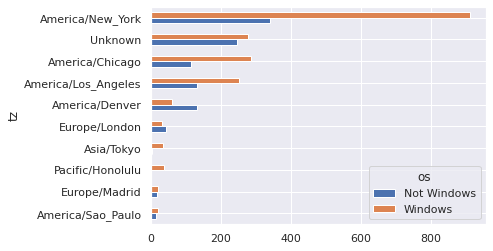

In [155]:
count_subset.plot(kind='barh')

In [156]:
count_subset = count_subset.stack()
count_subset.name = 'total' # name of the series becomes the name of the column after tranforming to a dataframe
count_subset = count_subset.reset_index() # transforming to a dataframe
count_subset

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.000
1,America/Sao_Paulo,Windows,20.000
2,Europe/Madrid,Not Windows,16.000
3,Europe/Madrid,Windows,19.000
4,Pacific/Honolulu,Not Windows,0.000
5,Pacific/Honolulu,Windows,36.000
6,Asia/Tokyo,Not Windows,2.000
7,Asia/Tokyo,Windows,35.000
8,Europe/London,Not Windows,43.000
9,Europe/London,Windows,31.000


In [157]:
count_subset_tranformed = count_subset.groupby('tz').transform(lambda x: x / x.sum())
count_subset_tranformed.columns = ['norm_total']

In [158]:
count_subset = pd.concat([count_subset, count_subset_tranformed], axis=1)
count_subset

,tz,os,total,norm_total
0,America/Sao_Paulo,Not Windows,13.000,0.394
1,America/Sao_Paulo,Windows,20.000,0.606
2,Europe/Madrid,Not Windows,16.000,0.457
3,Europe/Madrid,Windows,19.000,0.543
4,Pacific/Honolulu,Not Windows,0.000,0.000
5,Pacific/Honolulu,Windows,36.000,1.000
6,Asia/Tokyo,Not Windows,2.000,0.054
7,Asia/Tokyo,Windows,35.000,0.946
8,Europe/London,Not Windows,43.000,0.581
9,Europe/London,Windows,31.000,0.419


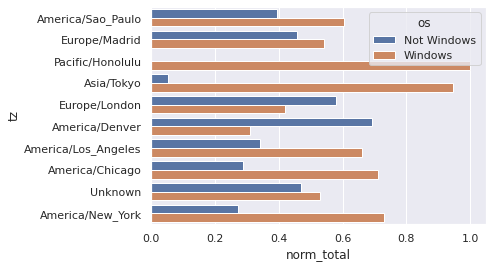

In [159]:
sns.barplot(x='norm_total', y='tz', hue='os', data=count_subset)

# 14.2 MovieLens 1M Dataset

In [160]:
# Make display smaller
pd.options.display.max_rows = 10

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('datasets/movielens/users.dat', sep='::', header=None, names=unames)

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('datasets/movielens/ratings.dat', sep='::', header=None, names=rnames)

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('datasets/movielens/movies.dat', sep='::', header=None, names=mnames)

users[:5]
ratings[:5]
movies[:5]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # This is added back by InteractiveShellApp.init_path()


,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [161]:
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [162]:
mean_ratings = pd.pivot_table(data, values=['rating'], index='title', columns='gender')
mean_ratings

rating      
gender                                          F     M
title                                                  
$1,000,000 Duck (1971)                      3.375 2.762
'Night Mother (1986)                        3.389 3.353
'Til There Was You (1997)                   2.676 2.733
'burbs, The (1989)                          2.793 2.962
...And Justice for All (1979)               3.829 3.689
...                                           ...   ...
Zed & Two Noughts, A (1985)                 3.500 3.381
Zero Effect (1998)                          3.864 3.723
Zero Kelvin (Kj�rlighetens kj�tere) (1995)    nan 3.500
Zeus and Roxanne (1997)                     2.778 2.357
eXistenZ (1999)                             3.099 3.289

[3706 rows x 2 columns]

In [163]:
ratings_by_title = data.groupby('title').size()
ratings_by_title.sort_values(ascending=False)

title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
                                                         ... 
Anna (1996)                                                 1
McCullochs, The (1975)                                      1
Shadows (Cienie) (1988)                                     1
Night Tide (1961)                                           1
Another Man's Poison (1952)                                 1
Length: 3706, dtype: int64

In [164]:
ratings_by_title[ratings_by_title >= 250]

title
'burbs, The (1989)                   303
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
                                    ... 
Young Guns (1988)                    562
Young Guns II (1990)                 369
Young Sherlock Holmes (1985)         379
Zero Effect (1998)                   301
eXistenZ (1999)                      410
Length: 1216, dtype: int64

In [165]:
mean_ratings[ratings_by_title >= 250]

rating      
gender                                 F     M
title                                         
'burbs, The (1989)                 2.793 2.962
10 Things I Hate About You (1999)  3.647 3.312
101 Dalmatians (1961)              3.791 3.500
101 Dalmatians (1996)              3.240 2.911
12 Angry Men (1957)                4.184 4.328
...                                  ...   ...
Young Guns (1988)                  3.372 3.426
Young Guns II (1990)               2.935 2.904
Young Sherlock Holmes (1985)       3.515 3.363
Zero Effect (1998)                 3.864 3.723
eXistenZ (1999)                    3.099 3.289

[1216 rows x 2 columns]

In [166]:
mean_ratings = mean_ratings.loc[ratings_by_title >= 250]
mean_ratings
type(mean_ratings)

rating      
gender                                 F     M
title                                         
'burbs, The (1989)                 2.793 2.962
10 Things I Hate About You (1999)  3.647 3.312
101 Dalmatians (1961)              3.791 3.500
101 Dalmatians (1996)              3.240 2.911
12 Angry Men (1957)                4.184 4.328
...                                  ...   ...
Young Guns (1988)                  3.372 3.426
Young Guns II (1990)               2.935 2.904
Young Sherlock Holmes (1985)       3.515 3.363
Zero Effect (1998)                 3.864 3.723
eXistenZ (1999)                    3.099 3.289

[1216 rows x 2 columns]

pandas.core.frame.DataFrame

In [167]:
mean_ratings.sort_values(by=('rating','F'), ascending=False) # top movies ratings by Females

# Note: Since columns in the data frame have a hierarchical index, if you want to sort by 'F' column you have to use
# a hierarchical qualifier for it as a tuple of hierarchical column name like ('rating', 'F') in the call to sort_values.
# This happened because in the pivot_table call above we used a list for values=['rating']. If used 'rating' only, there would 
# not be a hierarchical columns in the resulting data frame and it would just be F M

rating      
gender                                                  F     M
title                                                          
Close Shave, A (1995)                               4.644 4.474
Wrong Trousers, The (1993)                          4.588 4.478
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)       4.573 4.465
Wallace & Gromit: The Best of Aardman Animation...  4.563 4.385
Schindler's List (1993)                             4.563 4.491
...                                                   ...   ...
Avengers, The (1998)                                1.915 2.017
Speed 2: Cruise Control (1997)                      1.907 1.863
Rocky V (1990)                                      1.879 2.133
Barb Wire (1996)                                    1.585 2.100
Battlefield Earth (2000)                            1.574 1.617

[1216 rows x 2 columns]

In [168]:
mean_ratings['diff'] = mean_ratings[('rating','M')] - mean_ratings[('rating','F')]
mean_ratings

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


rating         diff
gender                                 F     M       
title                                                
'burbs, The (1989)                 2.793 2.962  0.169
10 Things I Hate About You (1999)  3.647 3.312 -0.335
101 Dalmatians (1961)              3.791 3.500 -0.291
101 Dalmatians (1996)              3.240 2.911 -0.329
12 Angry Men (1957)                4.184 4.328  0.144
...                                  ...   ...    ...
Young Guns (1988)                  3.372 3.426  0.054
Young Guns II (1990)               2.935 2.904 -0.031
Young Sherlock Holmes (1985)       3.515 3.363 -0.151
Zero Effect (1998)                 3.864 3.723 -0.141
eXistenZ (1999)                    3.099 3.289  0.190

[1216 rows x 3 columns]

In [169]:
mean_ratings.sort_values('diff', ascending=True) # movies highly rated by women that men did not rate as highly

rating         diff
gender                                      F     M       
title                                                     
Dirty Dancing (1987)                    3.790 2.960 -0.831
Jumpin' Jack Flash (1986)               3.255 2.578 -0.676
Grease (1978)                           3.975 3.367 -0.608
Little Women (1994)                     3.871 3.322 -0.549
Steel Magnolias (1989)                  3.902 3.366 -0.536
...                                       ...   ...    ...
Cable Guy, The (1996)                   2.250 2.864  0.614
Longest Day, The (1962)                 3.412 4.031  0.620
Dumb & Dumber (1994)                    2.698 3.337  0.639
Kentucky Fried Movie, The (1977)        2.879 3.555  0.676
Good, The Bad and The Ugly, The (1966)  3.495 4.221  0.726

[1216 rows x 3 columns]

In [170]:
mean_ratings.sort_values('diff', ascending=False) # movies highly rated by men that women did not rate as highly

rating         diff
gender                                      F     M       
title                                                     
Good, The Bad and The Ugly, The (1966)  3.495 4.221  0.726
Kentucky Fried Movie, The (1977)        2.879 3.555  0.676
Dumb & Dumber (1994)                    2.698 3.337  0.639
Longest Day, The (1962)                 3.412 4.031  0.620
Cable Guy, The (1996)                   2.250 2.864  0.614
...                                       ...   ...    ...
Steel Magnolias (1989)                  3.902 3.366 -0.536
Little Women (1994)                     3.871 3.322 -0.549
Grease (1978)                           3.975 3.367 -0.608
Jumpin' Jack Flash (1986)               3.255 2.578 -0.676
Dirty Dancing (1987)                    3.790 2.960 -0.831

[1216 rows x 3 columns]

# 14.3 US Baby Names 1880–2010

In [171]:
columns = ['name', 'sex', 'births']
names1880 = pd.read_csv('datasets/babynames/yob1880.txt', names=columns)
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [172]:
names1880.groupby('sex').sum()

,births
sex,
F,90993
M,110493


In [173]:
years = range(1880, 2011)

pieces = []

#names = pd.DataFrame(columns = columns+['year']) # dtypes will all be object, not good!!

for year in years:
    frame = pd.read_csv('datasets/babynames/yob%d.txt' % year, names=columns)
    frame['year'] = year
    pieces.append(frame)
    
names = pd.concat(pieces, ignore_index=True) #this way dtypes of columns will be int, float, etc as appropriate
names.info()
names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   name    1690784 non-null  object
 1   sex     1690784 non-null  object
 2   births  1690784 non-null  int64 
 3   year    1690784 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [174]:
names.groupby(['year', 'sex']).births.sum().unstack()

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310


In [175]:
total_births  = names.pivot_table(values='births', index='year', columns='sex', aggfunc=sum)
total_births

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310


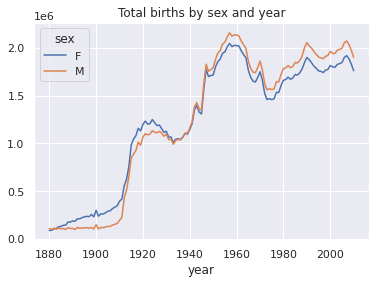

In [176]:
total_births.plot(title='Total births by sex and year')

In [177]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)
names

#for name, group in names.groupby(['year', 'sex']):
#    print (name)
#    group

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.078
1,Anna,F,2604,1880,0.029
2,Emma,F,2003,1880,0.022
3,Elizabeth,F,1939,1880,0.021
4,Minnie,F,1746,1880,0.019
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000
1690780,Zyonne,M,5,2010,0.000
1690781,Zyquarius,M,5,2010,0.000
1690782,Zyran,M,5,2010,0.000


In [178]:
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F     1.000
      M     1.000
1881  F     1.000
      M     1.000
1882  F     1.000
             ... 
2008  M     1.000
2009  F     1.000
      M     1.000
2010  F     1.000
      M     1.000
Name: prop, Length: 262, dtype: float64

In [179]:
#get top 1000 names by year and sex
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

top1000 = names.groupby(['year', 'sex']).apply(get_top1000)
top1000.reset_index(inplace=True, drop=True)
top1000.info()
top1000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261877 entries, 0 to 261876
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   name    261877 non-null  object 
 1   sex     261877 non-null  object 
 2   births  261877 non-null  int64  
 3   year    261877 non-null  int64  
 4   prop    261877 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 10.0+ MB


,name,sex,births,year,prop
0,Mary,F,7065,1880,0.078
1,Anna,F,2604,1880,0.029
2,Emma,F,2003,1880,0.022
3,Elizabeth,F,1939,1880,0.021
4,Minnie,F,1746,1880,0.019
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000
261873,Destin,M,194,2010,0.000
261874,Jaquan,M,194,2010,0.000
261875,Jaydan,M,194,2010,0.000


## Analyzing Naming Trends

In [180]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

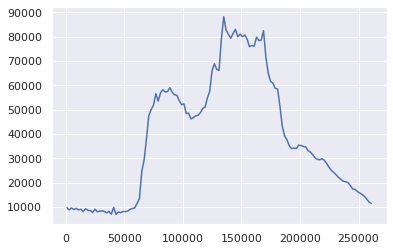

In [181]:
boys[boys.name == 'John']['births'].plot()

In [182]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9a81ff128>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fb98a0c6da0>], dtype=object)

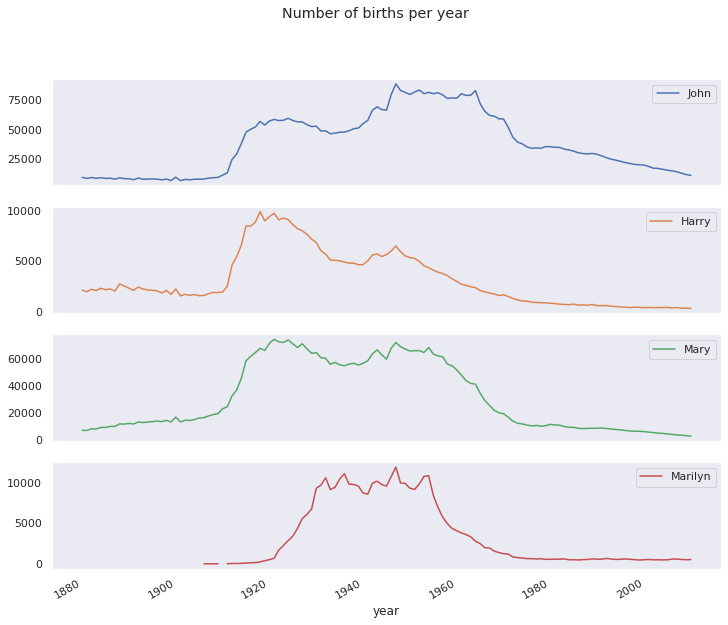

In [183]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=False, title="Number of births per year")

## Measuring the increase in naming diversity

In [184]:
total_prop = top1000.pivot_table(values='prop', index='year', columns='sex', aggfunc=sum)
total_prop

sex,F,M
year,,
1880,1.000,0.997
1881,1.000,1.000
1882,0.999,0.996
1883,0.998,0.999
1884,0.993,0.995
...,...,...
2006,0.753,0.860
2007,0.746,0.855
2008,0.741,0.850


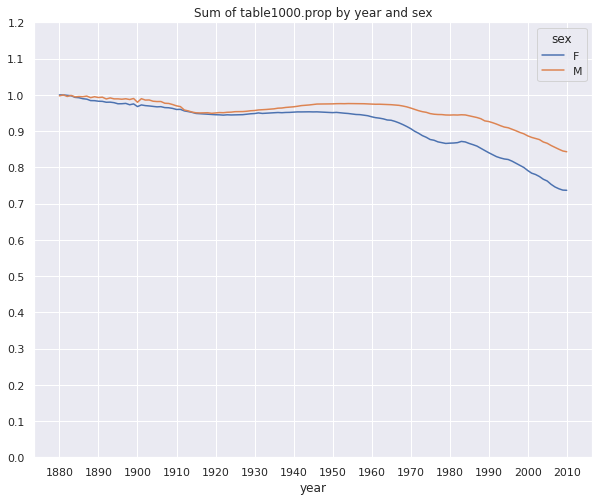

In [185]:
sns.set()
total_prop.plot(title='Sum of table1000.prop by year and sex', yticks=np.linspace(0, 1.2, 13), 
                xticks=range(1880, 2020, 10), figsize=(10,8))

In [186]:
def get_quantile_count(group, q=0.5):
    return group.sort_values(by='prop', ascending=False).prop.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)

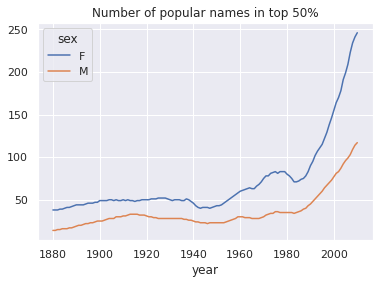

In [187]:
diversity.unstack().plot(title="Number of popular names in top 50%")

Notice it needs more names as years progress in order to reach 50% of births in a paricular year. 
As you can see, girl names have always been more diverse than boy names, and they have only become more so over time.

## Boy names that became girl names (and vice versa)

Another fun trend is looking at boy names that were more popular with one sex ear‐
lier in the sample but have “changed sexes” in the present. One example is the name
Lesley or Leslie.

In [188]:
all_names = pd.Series(top1000.name.unique()) # series containing unique names
lesley_like = all_names[all_names.str.lower().str.contains('lesl')] # get all names like *Lesl*
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [189]:
filtered = top1000[top1000.name.isin(lesley_like)] # return a subset dataframe of names like *lesl*
filtered

,name,sex,births,year,prop
632,Leslie,F,8,1880,0.000
1108,Leslie,M,79,1880,0.001
2462,Leslie,F,11,1881,0.000
3014,Leslie,M,92,1881,0.001
4512,Leslie,F,9,1882,0.000
...,...,...,...,...,...
256327,Lesly,F,699,2008,0.000
258036,Leslie,F,1975,2009,0.001
258378,Lesly,F,598,2009,0.000
260073,Leslie,F,1558,2010,0.001


In [190]:
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [191]:
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')
table

sex,F,M
year,,
1880,8.000,79.000
1881,11.000,92.000
1882,9.000,128.000
1883,7.000,125.000
1884,15.000,125.000
...,...,...
2006,4166.000,nan
2007,3805.000,nan
2008,3022.000,nan


In [192]:
table = table.div(table.sum(1), axis=0)
table

sex,F,M
year,,
1880,0.092,0.908
1881,0.107,0.893
1882,0.066,0.934
1883,0.053,0.947
1884,0.107,0.893
...,...,...
2006,1.000,nan
2007,1.000,nan
2008,1.000,nan


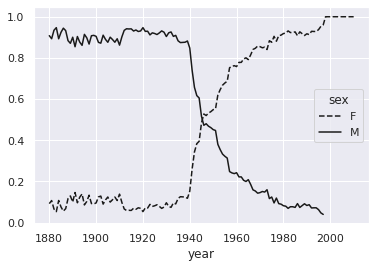

In [193]:
table.plot(style={'M': 'k-', 'F': 'k--'})

In [194]:
table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F       131 non-null    float64
 1   M       118 non-null    float64
dtypes: float64(2)
memory usage: 3.1 KB


# 14.4 USDA Food Database

In [195]:
import json
db = json.load(open('datasets/usda_food/database.json'))
len(db)

6636

In [196]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [197]:
db[0]['nutrients'][0].keys()

dict_keys(['value', 'units', 'description', 'group'])

In [198]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db, columns=info_keys)
info.tail()

,description,group,id,manufacturer
6631,"Bologna, beef, low fat",Sausages and Luncheon Meats,42161,
6632,"Turkey and pork sausage, fresh, bulk, patty or...",Sausages and Luncheon Meats,42173,
6633,"Babyfood, juice, pear",Baby Foods,43408,None
6634,"Babyfood, dessert, banana yogurt, strained",Baby Foods,43539,None
6635,"Babyfood, banana no tapioca, strained",Baby Foods,43546,None


In [199]:
info['group'].value_counts()

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
                                    ... 
Dairy and Egg Products               107
Fats and Oils                         97
Meals, Entrees, and Sidedishes        57
Restaurant Foods                      51
Spices and Herbs                      41
Name: group, Length: 25, dtype: int64

In [200]:
pieces = []

for food in db:
    nutrients = pd.DataFrame(food['nutrients'], columns=['description', 'group', 'units', 'value'])
    nutrients['id'] = food['id']
    pieces.append(nutrients)
    
nutrients = pd.concat(pieces, ignore_index=True)

nutrients

,description,group,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
...,...,...,...,...,...
389350,"Vitamin B-12, added",Vitamins,mcg,0.000,43546
389351,Cholesterol,Other,mg,0.000,43546
389352,"Fatty acids, total saturated",Other,g,0.072,43546
389353,"Fatty acids, total monounsaturated",Other,g,0.028,43546


In [201]:
nutrients[nutrients.duplicated()].sort_values(by=['description', 'group', 'units', 'value', 'id'])

,description,group,units,value,id
19919,Alanine,Amino Acids,g,0.000,2048
2553,Alanine,Amino Acids,g,0.031,1068
2608,Alanine,Amino Acids,g,0.031,1068
20150,Alanine,Amino Acids,g,0.047,1067
20221,Alanine,Amino Acids,g,0.047,1067
...,...,...,...,...,...
19219,"Zinc, Zn",Elements,mg,4.700,2038
17928,"Zinc, Zn",Elements,mg,5.440,2029
18012,"Zinc, Zn",Elements,mg,5.440,2029
14037,"Zinc, Zn",Elements,mg,8.800,2008


In [202]:
nutrients = nutrients.drop_duplicates()

In [203]:
col_mapping = {'description' : 'food',
                'group' : 'fgroup'}
info = info.rename(columns=col_mapping, copy=False)
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   food          6636 non-null   object
 1   fgroup        6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [204]:
col_mapping = {'description' : 'nutrient',
                'group' : 'nutgroup'}

nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 389354
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   nutrient  375176 non-null  object 
 1   nutgroup  375176 non-null  object 
 2   units     375176 non-null  object 
 3   value     375176 non-null  float64
 4   id        375176 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 17.2+ MB


In [205]:
nutrients

,nutrient,nutgroup,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
...,...,...,...,...,...
389350,"Vitamin B-12, added",Vitamins,mcg,0.000,43546
389351,Cholesterol,Other,mg,0.000,43546
389352,"Fatty acids, total saturated",Other,g,0.072,43546
389353,"Fatty acids, total monounsaturated",Other,g,0.028,43546


In [206]:
ndata = pd.merge(nutrients, info, on='id', how='outer')
ndata.info()
ndata

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   nutrient      375176 non-null  object 
 1   nutgroup      375176 non-null  object 
 2   units         375176 non-null  object 
 3   value         375176 non-null  float64
 4   id            375176 non-null  int64  
 5   food          375176 non-null  object 
 6   fgroup        375176 non-null  object 
 7   manufacturer  293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


,nutrient,nutgroup,units,value,id,food,fgroup,manufacturer
0,Protein,Composition,g,25.180,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.200,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.060,1008,"Cheese, caraway",Dairy and Egg Products,
3,Ash,Other,g,3.280,1008,"Cheese, caraway",Dairy and Egg Products,
4,Energy,Energy,kcal,376.000,1008,"Cheese, caraway",Dairy and Egg Products,
...,...,...,...,...,...,...,...,...
375171,"Vitamin B-12, added",Vitamins,mcg,0.000,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None
375172,Cholesterol,Other,mg,0.000,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None
375173,"Fatty acids, total saturated",Other,g,0.072,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None
375174,"Fatty acids, total monounsaturated",Other,g,0.028,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None


In [207]:
ndata.iloc[30000]

nutrient                                       Glycine
nutgroup                                   Amino Acids
units                                                g
value                                            0.040
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

In [208]:
ndata[ndata.nutrient == 'Zinc, Zn']

,nutrient,nutgroup,units,value,id,food,fgroup,manufacturer
14,"Zinc, Zn",Elements,mg,2.940,1008,"Cheese, caraway",Dairy and Egg Products,
75,"Zinc, Zn",Elements,mg,3.110,1009,"Cheese, cheddar",Dairy and Egg Products,
151,"Zinc, Zn",Elements,mg,3.750,1018,"Cheese, edam",Dairy and Egg Products,
222,"Zinc, Zn",Elements,mg,2.880,1019,"Cheese, feta",Dairy and Egg Products,
293,"Zinc, Zn",Elements,mg,2.760,1028,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,
...,...,...,...,...,...,...,...,...
374940,"Zinc, Zn",Elements,mg,1.830,42161,"Bologna, beef, low fat",Sausages and Luncheon Meats,
374991,"Zinc, Zn",Elements,mg,3.170,42173,"Turkey and pork sausage, fresh, bulk, patty or...",Sausages and Luncheon Meats,
375043,"Zinc, Zn",Elements,mg,0.080,43408,"Babyfood, juice, pear",Baby Foods,None
375093,"Zinc, Zn",Elements,mg,0.260,43539,"Babyfood, dessert, banana yogurt, strained",Baby Foods,None


nutrient          fgroup                           
Adjusted Protein  Sweets                              12.900
                  Vegetables and Vegetable Products    2.180
Alanine           Baby Foods                           0.085
                  Baked Products                       0.248
                  Beef Products                        1.550
                                                       ...  
Zinc, Zn          Snacks                               1.470
                  Soups, Sauces, and Gravies           0.200
                  Spices and Herbs                     2.750
                  Sweets                               0.360
                  Vegetables and Vegetable Products    0.330
Name: value, Length: 2246, dtype: float64

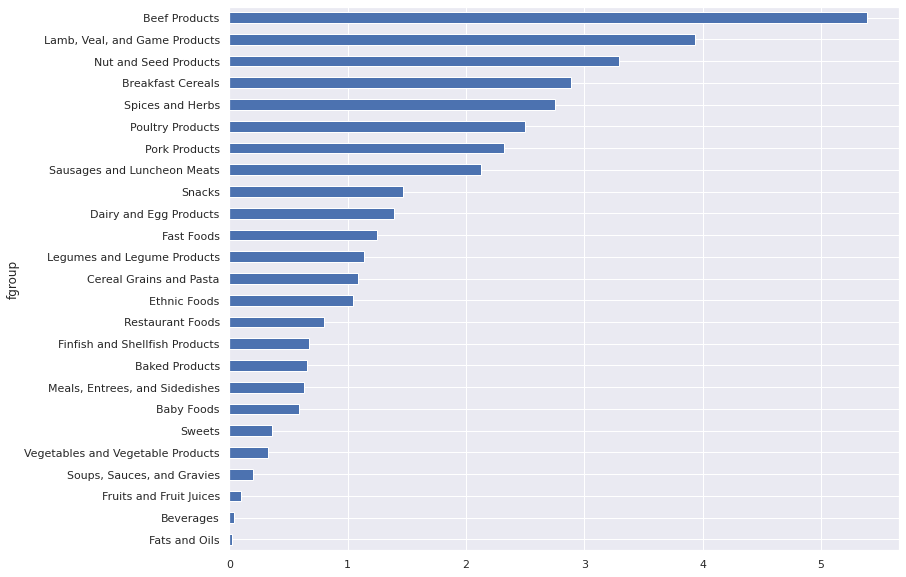

In [209]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
result
result['Zinc, Zn'].sort_values().plot(kind='barh', figsize=(12, 10))

In [210]:
# Which food is most dense in each nutrient ??
def get_max_value_food(group):
    return group.loc[group.value.idxmax()][['value', 'food']]
    
max_nutrient = ndata.groupby(['nutgroup','nutrient']).apply(get_max_value_food)

In [211]:
max_nutrient

value  \
nutgroup    nutrient                                
Amino Acids Alanine                         8.009   
            Arginine                        7.436   
            Aspartic acid                  10.203   
            Cystine                         1.307   
            Glutamic acid                  17.452   
...                                           ...   
Vitamins    Vitamin D2 (ergocalciferol)    28.100   
            Vitamin D3 (cholecalciferol)   27.400   
            Vitamin E (alpha-tocopherol)  149.400   
            Vitamin E, added               46.550   
            Vitamin K (phylloquinone)    1714.500   

                                                                                       food  
nutgroup    nutrient                                                                         
Amino Acids Alanine                                       Gelatins, dry powder, unsweetened  
            Arginine                                           Seeds, sesame flour, low-fat  
            Aspartic acid                                               Soy protein isolate  
            Cystine                            Seeds, cottonseed flour, low fat (glandless)  
            Glutamic acid                                               Soy protein isolate  
...                                                                                     ...  
Vitamins    Vitamin D2 (ergocalciferol)                             Mushrooms, maitake, raw  
            Vitamin D3 (cholecalciferol)                      Fish, halibut, Greenland, raw  
            Vitamin E (alpha-tocopherol)                                    Oil, wheat germ  
            Vitamin E, added              Cereals ready-to-eat, GENERAL MILLS, Multi-Gra...  
            Vitamin K (phylloquinone)                                  Spices, sage, ground  

[94 rows x 2 columns]

# 14.5 2012 Federal Election Commission Database

In [212]:
fec = pd.read_csv('datasets/fec/P00000001-ALL.csv')
fec.info()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [213]:
fec.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.000,RETIRED,RETIRED,250.000,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.000,RETIRED,RETIRED,50.000,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.000,INFORMATION REQUESTED,INFORMATION REQUESTED,250.000,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.000,NONE,RETIRED,250.000,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.000,NONE,RETIRED,300.000,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [214]:
fec.iloc[123456]

cmte_id             C00431445
cand_id             P80003338
cand_nm         Obama, Barack
contbr_nm         ELLMAN, IRA
contbr_city             TEMPE
                    ...      
receipt_desc              NaN
memo_cd                   NaN
memo_text                 NaN
form_tp                 SA17A
file_num               772372
Name: 123456, Length: 16, dtype: object

In [215]:
unique_cands = fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack', "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [216]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

fec['party'] = fec.cand_nm.map(parties)
fec.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.000,RETIRED,RETIRED,250.000,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.000,RETIRED,RETIRED,50.000,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.000,INFORMATION REQUESTED,INFORMATION REQUESTED,250.000,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.000,NONE,RETIRED,250.000,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.000,NONE,RETIRED,300.000,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [217]:
fec.party.value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [218]:
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [219]:
fec = fec[fec.contb_receipt_amt > 0] # exclude refunds

In [220]:
fec_mrbo = fec[fec.cand_nm.isin(['Romney, Mitt', 'Obama, Barack'])] # get data for two main candidates only
fec_mrbo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 694282 entries, 411 to 701385
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   cmte_id            694282 non-null  object 
 1   cand_id            694282 non-null  object 
 2   cand_nm            694282 non-null  object 
 3   contbr_nm          694282 non-null  object 
 4   contbr_city        694275 non-null  object 
 5   contbr_st          694278 non-null  object 
 6   contbr_zip         694234 non-null  object 
 7   contbr_employer    693607 non-null  object 
 8   contbr_occupation  693524 non-null  object 
 9   contb_receipt_amt  694282 non-null  float64
 10  contb_receipt_dt   694282 non-null  object 
 11  receipt_desc       2345 non-null    object 
 12  memo_cd            87387 non-null   object 
 13  memo_text          90672 non-null   object 
 14  form_tp            694282 non-null  object 
 15  file_num           694282 non-null  int64  
 16  

In [221]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [222]:
# map not provided occupations
occ_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
    'C.E.O.': 'CEO'
}

f = lambda x : occ_mapping.get(x, x) # second x means return key if value if not present
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [223]:
# map not provided employers
emp_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'SELF' : 'SELF-EMPLOYED',
    'SELF EMPLOYED' : 'SELF-EMPLOYED',
}
# If no mapping provided, return x
f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

In [224]:
by_occupation = fec.pivot_table('contb_receipt_amt', index = 'contbr_occupation', columns='party', aggfunc='sum')

In [225]:
over2m = by_occupation[by_occupation.sum(1) > 2000000]
over2m

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.970,7477194.430
CEO,2074974.790,4211040.520
CONSULTANT,2459912.710,2544725.450
ENGINEER,951525.550,1818373.700
EXECUTIVE,1355161.050,4138850.090
...,...,...
PRESIDENT,1878509.950,4720923.760
PROFESSOR,2165071.080,296702.730
REAL ESTATE,528902.090,1625902.250


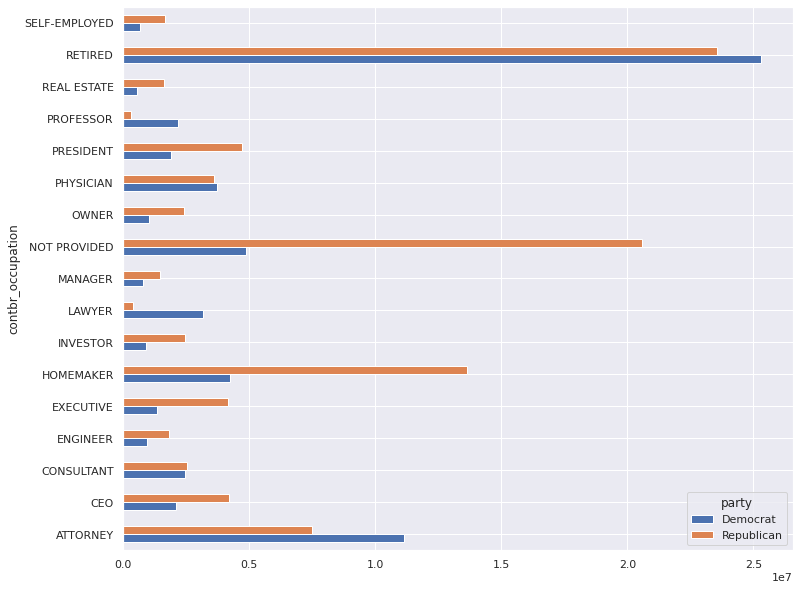

In [226]:
over2m.plot(kind='barh', figsize=(12,10))

In [227]:
# get top donor occupations / companies for each of the two main candidates

def get_top_donor_by_occupation(group):
    print(type(group))
    groups = group.groupby('contbr_occupation')['contb_receipt_amt'].sum()
    print(type(groups.nlargest(10)))
    return groups.nlargest(10)
    
    
top_donor_by_occupation = fec_mrbo.groupby(['cand_nm']).apply(get_top_donor_by_occupation)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [228]:
top_donor_by_occupation['Obama, Barack']

contbr_occupation
RETIRED                 25305116.380
ATTORNEY                11141982.970
INFORMATION REQUESTED    4866973.960
HOMEMAKER                4248875.800
PHYSICIAN                3735124.940
LAWYER                   3160478.870
CONSULTANT               2459912.710
PROFESSOR                2165071.080
CEO                      2073284.790
PRESIDENT                1878509.950
Name: contb_receipt_amt, dtype: float64

In [229]:
top_donor_by_occupation['Romney, Mitt']

contbr_occupation
RETIRED                                  11508473.590
INFORMATION REQUESTED PER BEST EFFORTS   11396894.840
HOMEMAKER                                 8147446.220
ATTORNEY                                  5364718.820
PRESIDENT                                 2491244.890
EXECUTIVE                                 2300947.030
C.E.O.                                    1968386.110
INVESTOR                                  1537595.120
CONSULTANT                                1424894.010
PHYSICIAN                                 1368023.960
Name: contb_receipt_amt, dtype: float64

In [230]:
# get top donor occupations / companies for each of the two main candidates

def get_top_donor_by_employer(group):
    groups = group.groupby('contbr_employer')['contb_receipt_amt'].sum()
    return groups.nlargest(10)
    
    
top_donor_by_employer = fec_mrbo.groupby(['cand_nm']).apply(get_top_donor_by_employer)

In [231]:
top_donor_by_employer

cand_nm        contbr_employer      
Obama, Barack  RETIRED                 22694358.850
               SELF-EMPLOYED           17080985.960
               NOT EMPLOYED             8586308.700
               INFORMATION REQUESTED    5053480.370
               HOMEMAKER                2605408.540
                                           ...     
Romney, Mitt   CREDIT SUISSE             281150.000
               MORGAN STANLEY            267266.000
               GOLDMAN SACH & CO.        238250.000
               BARCLAYS CAPITAL          162750.000
               H.I.G. CAPITAL            139500.000
Name: contb_receipt_amt, Length: 20, dtype: float64

## Bucketing Donation Amounts

In [232]:
bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] <
                                  (100000, 1000000] < (1000000, 10000000]]

In [233]:
fec_mrbo.groupby(['cand_nm', labels]).size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


In [234]:
bucket_sums = fec_mrbo.groupby(['cand_nm', labels]).contb_receipt_amt.sum().unstack(0)

bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.240,77.000
"(1, 10]",337267.620,29819.660
"(10, 100]",20288981.410,1987783.760
"(100, 1000]",54798531.460,22363381.690
"(1000, 10000]",51753705.670,63942145.420
"(10000, 100000]",59100.000,12700.000
"(100000, 1000000]",1490683.080,nan
"(1000000, 10000000]",7148839.760,nan


In [235]:
normed_sums = bucket_sums.div(bucket_sums.sum(1), 0)
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805,0.195
"(1, 10]",0.919,0.081
"(10, 100]",0.911,0.089
"(100, 1000]",0.710,0.290
"(1000, 10000]",0.447,0.553
"(10000, 100000]",0.823,0.177
"(100000, 1000000]",1.000,nan
"(1000000, 10000000]",1.000,nan


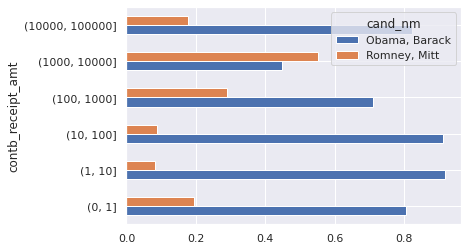

In [236]:
normed_sums[:-2].plot(kind='barh')

## Donation Statistics by State

In [237]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
totals

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.150,86204.240
AL,543123.480,527303.510
AR,359247.280,105556.000
AZ,1506476.980,1888436.230
CA,23824984.240,11237636.600
...,...,...
WA,4250933.160,1341521.560
WI,1130155.460,270316.320
WV,169154.470,126725.120


In [238]:
percent = totals.div(totals.sum(1), 0)
percent

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.766,0.234
AL,0.507,0.493
AR,0.773,0.227
AZ,0.444,0.556
CA,0.679,0.321
...,...,...
WA,0.760,0.240
WI,0.807,0.193
WV,0.572,0.428
